<a href="https://colab.research.google.com/github/sebastianvettel1212/Zacky-Yusup-Hakim/blob/main/bpm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import drive
drive.mount('/content/drive')
!pip install librosa soundfile scikit-learn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
GTZAN_PATH = "/content/drive/MyDrive/bpm_project/gtzan/Data/genres_original"
CSV_PATH = "/content/drive/MyDrive/bpm_project/bpm.csv"

In [54]:
import os
print(os.listdir(GTZAN_PATH))

['rock', 'reggae', 'pop', 'metal', 'jazz', 'hiphop', 'disco', 'country', 'blues', 'classical']


In [55]:
import pandas as pd
df = pd.read_csv(CSV_PATH)
df.head()

,filename,bpm
0,blues/blues.00000.wav,123.046875
1,blues/blues.00001.wav,107.666016
2,blues/blues.00002.wav,161.499023
3,blues/blues.00003.wav,172.265625
4,blues/blues.00004.wav,135.999178


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1JH2TLPmNIRF1Syf-beWxnLtQHZFirhrKYXLDnNBVq04/edit#gid=0


In [56]:
import librosa
import numpy as np

def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=22050, duration=10, offset=5)

    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfcc_mean = np.mean(mfcc.T, axis=0)

    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    bw = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))

    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)

    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    tempo = float(tempo.item())

    return np.hstack([mfcc_mean, zcr, centroid, bw, chroma, tempo])

In [47]:
import os

features = []
labels = []

expected_length = 36

for idx, row in df.iterrows():

    audio_path = os.path.join(GTZAN_PATH, row["filename"])


    if not os.path.exists(audio_path):
        print("FILE TIDAK ADA:", audio_path)
        continue

    try:
        feat = extract_features(audio_path)


        if len(feat) != expected_length:
            print("PANJANG FITUR TIDAK SESUAI:", audio_path, len(feat))
            continue

        features.append(feat)
        labels.append(row["bpm"])

    except Exception as e:
        print("GAGAL MEMBACA:", audio_path)
        print(e)
        continue


    if idx % 20 == 0:
        print(f"{idx} Files Processed ")

print("SELESAI 👍")
print("Total fitur berhasil:", len(features))
print("Total label:", len(labels))


0 Files Processed 
20 Files Processed 
40 Files Processed 
60 Files Processed 
80 Files Processed 
100 Files Processed 
120 Files Processed 
140 Files Processed 
160 Files Processed 
180 Files Processed 
200 Files Processed 
220 Files Processed 
240 Files Processed 
260 Files Processed 
280 Files Processed 
300 Files Processed 
320 Files Processed 
340 Files Processed 
360 Files Processed 
380 Files Processed 
400 Files Processed 
420 Files Processed 
440 Files Processed 
460 Files Processed 
480 Files Processed 
500 Files Processed 
520 Files Processed 
540 Files Processed 
560 Files Processed 
580 Files Processed 
600 Files Processed 
620 Files Processed 
640 Files Processed 
660 Files Processed 
680 Files Processed 
700 Files Processed 
720 Files Processed 
740 Files Processed 
760 Files Processed 
780 Files Processed 
800 Files Processed 
820 Files Processed 
840 Files Processed 
860 Files Processed 
880 Files Processed 
900 Files Processed 
920 Files Processed 
940 Files Processed

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
X = np.array(features)
y = np.array(labels)

print(X.shape)
print(y.shape)

(999, 36)
(999,)


In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = np.array(features)
y = np.array(labels)

print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42  # ⭐ 80-20 split lebih baik
)

print(f"\nTrain samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")



Shape X: (999, 36)
Shape y: (999,)

Train samples: 799
Test samples: 200


In [60]:
y


array([123.046875  , 107.66601562, 161.49902344, 172.265625  ,
       135.99917763, 112.34714674, 123.046875  ,  92.28515625,
        83.35433468, 129.19921875, 161.49902344, 161.49902344,
        92.28515625, 107.66601562, 151.99908088,  99.38401442,
       103.359375  , 161.49902344,  83.35433468, 123.046875  ,
       135.99917763,  99.38401442,  99.38401442,  95.703125  ,
       103.359375  ,  92.28515625,  83.35433468,  95.703125  ,
       103.359375  , 129.19921875, 143.5546875 , 151.99908088,
       123.046875  , 151.99908088, 129.19921875, 129.19921875,
       151.99908088, 123.046875  , 129.19921875, 117.45383523,
       117.45383523, 129.19921875,  89.10290948, 129.19921875,
       135.99917763, 129.19921875, 123.046875  , 151.99908088,
       123.046875  , 123.046875  , 135.99917763,  99.38401442,
       151.99908088, 103.359375  ,  92.28515625, 135.99917763,
       161.49902344,  92.28515625, 107.66601562, 107.66601562,
       151.99908088, 129.19921875, 112.34714674,  92.28

In [61]:
df
X

array([[-1.19672646e+02,  1.24564941e+02, -1.60427895e+01, ...,
         4.79806662e-01,  3.89401972e-01,  1.23046875e+02],
       [-2.13818481e+02,  1.37020370e+02, -6.96216726e+00, ...,
         2.65978068e-01,  2.84314543e-01,  1.07666016e+02],
       [-8.82211304e+01,  1.46527557e+02, -2.93915329e+01, ...,
         4.32427555e-01,  5.66103876e-01,  1.61499023e+02],
       ...,
       [-1.35232025e+02,  1.12960030e+02, -4.19786987e+01, ...,
         3.72020334e-01,  3.77549887e-01,  1.29199219e+02],
       [-1.74319366e+02,  1.23196571e+02, -2.18448067e+01, ...,
         2.46052593e-01,  3.36078227e-01,  2.15332031e+02],
       [-2.38537094e+02,  1.21213531e+02, -1.37357388e+01, ...,
         1.96445361e-01,  4.65750784e-01,  1.23046875e+02]])

In [62]:
z = pd.DataFrame(X)
z

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-119.672646,124.564941,-16.042789,43.640247,-8.191674,19.883366,-12.857180,16.675789,-13.686779,11.973815,...,0.247392,0.249999,0.331738,0.321324,0.412406,0.289003,0.299750,0.479807,0.389402,123.046875
1,-213.818481,137.020370,-6.962167,36.489605,2.458514,21.631535,-11.164248,22.743647,-9.873964,12.696535,...,0.193807,0.180387,0.336090,0.464462,0.684968,0.417794,0.286547,0.265978,0.284315,107.666016
2,-88.221130,146.527557,-29.391533,36.747467,-18.931547,27.227442,-13.361744,13.077403,-12.436178,9.765701,...,0.372852,0.475873,0.373333,0.324464,0.323138,0.369323,0.494750,0.432428,0.566104,161.499023
3,-203.680176,151.788696,2.753470,25.350971,0.848503,12.231601,-6.962372,10.309015,1.227169,9.029984,...,0.479146,0.671764,0.547450,0.394222,0.250852,0.267165,0.345490,0.331695,0.419766,63.024009
4,-158.149765,125.478577,-40.742752,25.613569,-36.847816,13.955962,-25.373808,4.217686,-13.344772,4.582002,...,0.174277,0.462965,0.229911,0.140025,0.304691,0.321219,0.583559,0.296697,0.187839,135.999178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-182.810669,118.620850,-23.589300,57.971470,-7.177581,19.516665,-11.030460,16.660931,-22.503883,15.187767,...,0.380242,0.227345,0.175650,0.327654,0.384323,0.274018,0.364187,0.170722,0.113904,103.359375
995,-160.614670,114.685776,-27.047855,47.689381,-5.322103,23.435896,-16.149874,21.290005,-21.202812,11.079953,...,0.273038,0.511428,0.278607,0.194089,0.267414,0.631762,0.740900,0.411105,0.303054,117.453835
996,-135.232025,112.960030,-41.978699,51.875427,-16.966244,25.687632,-12.283493,18.510847,-18.186243,8.730800,...,0.394407,0.560569,0.317774,0.340344,0.443194,0.336128,0.524060,0.372020,0.377550,129.199219
997,-174.319366,123.196571,-21.844807,58.525322,6.919295,26.588196,-11.914558,18.881739,-10.926881,18.568783,...,0.264522,0.403743,0.517964,0.414648,0.469568,0.386560,0.349121,0.246053,0.336078,215.332031


In [ ]:
z = pd.DataFrame(X, columns=feature_names)
z.head()


,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,mfcc_mean_10,...,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,chroma_12,tempo
0,-119.672646,124.564941,-16.042789,43.640247,-8.191674,19.883366,-12.857180,16.675789,-13.686779,11.973815,...,0.247392,0.249999,0.331738,0.321324,0.412406,0.289003,0.299750,0.479807,0.389402,123.046875
1,-213.818481,137.020370,-6.962167,36.489605,2.458514,21.631535,-11.164248,22.743647,-9.873964,12.696535,...,0.193807,0.180387,0.336090,0.464462,0.684968,0.417794,0.286547,0.265978,0.284315,107.666016
2,-88.221130,146.527557,-29.391533,36.747467,-18.931547,27.227442,-13.361744,13.077403,-12.436178,9.765701,...,0.372852,0.475873,0.373333,0.324464,0.323138,0.369323,0.494750,0.432428,0.566104,161.499023
3,-203.680176,151.788696,2.753470,25.350971,0.848503,12.231601,-6.962372,10.309015,1.227169,9.029984,...,0.479146,0.671764,0.547450,0.394222,0.250852,0.267165,0.345490,0.331695,0.419766,63.024009
4,-158.149765,125.478577,-40.742752,25.613569,-36.847816,13.955962,-25.373808,4.217686,-13.344772,4.582002,...,0.174277,0.462965,0.229911,0.140025,0.304691,0.321219,0.583559,0.296697,0.187839,135.999178


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE :", mean_absolute_error(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE:", rmse)

print("R²  :", r2_score(y_test, y_pred))


MAE : 12.980325634253438
RMSE: 17.324847009449094
R²  : 0.2560665529182289


In [64]:
for k in [1,3,5,7,9,11,13,15]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    print("k =", k, " MAE =", mae)

k = 1  MAE = 16.20215785150052
k = 3  MAE = 13.976666798513955
k = 5  MAE = 12.980325634253438
k = 7  MAE = 12.963912118300197
k = 9  MAE = 12.99027337460896
k = 11  MAE = 13.106033580534023
k = 13  MAE = 13.380310320564764
k = 15  MAE = 13.445472665457807


In [65]:
import joblib
joblib.dump(model, "/content/drive/MyDrive/bpm_project/knn_bpm_model.pkl")
joblib.dump(scaler, "/content/drive/MyDrive/bpm_project/scaler.pkl")

['/content/drive/MyDrive/bpm_project/scaler.pkl']

In [66]:
def predict_bpm(file_path):
    model = joblib.load("/content/drive/MyDrive/bpm_project/knn_bpm_model.pkl")
    scaler = joblib.load("/content/drive/MyDrive/bpm_project/scaler.pkl")

    feat = extract_features(file_path)
    feat_scaled = scaler.transform([feat])

    pred = model.predict(feat_scaled)[0]

    return pred

In [67]:
song1 = "/content/drive/MyDrive/bpm_project/new/test.wav"
song2 = "/content/drive/MyDrive/bpm_project/new/turn-the-lights-off-made-with.mp3"



print(f"BPM lagu 1: {predict_bpm(song1):.2f} BPM")
print(f"BPM lagu 2: {predict_bpm(song2):.2f} BPM")


BPM lagu 1: 119.80 BPM
BPM lagu 2: 132.91 BPM


In [68]:
import os
print(os.listdir("/content/drive/MyDrive/bpm_project/new"))

['test.wav', 'turn-the-lights-off-made-with.mp3']


In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


LinearRegression()

In [71]:
y_pred1 = model_lr.predict(X_test)

print("MAE :", mean_absolute_error(y_test, y_pred1))

mse = mean_squared_error(y_test, y_pred1)
rmse = mse ** 0.5
print("RMSE:", rmse)

print("R²  :", r2_score(y_test, y_pred1))

MAE : 13.88006700565134
RMSE: 18.369618400490488
R²  : 0.16363560171205205


In [89]:
feature_names = []

for i in range(1, 21):
    feature_names.append(f"mfcc_mean_{i}")

feature_names += [
    "zcr",
    "spectral_centroid",
    "spectral_bandwidth"
]

for i in range(1, 13):
    feature_names.append(f"chroma_{i}")

feature_names.append("tempo")


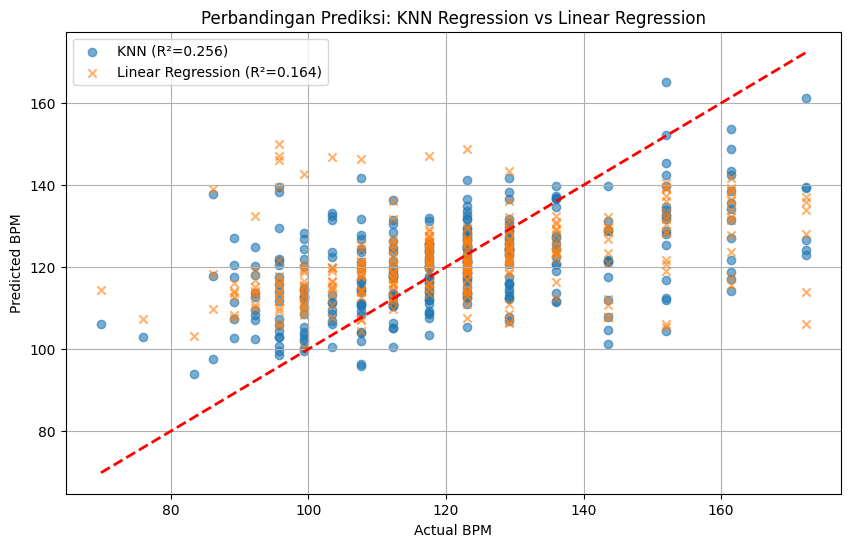


=== HASIL KNN ===
MAE : 12.980325634253438
RMSE: 17.324847009449094
R²  : 0.2560665529182289

=== HASIL LINEAR REGRESSION ===
MAE : 13.88006700565134
RMSE: 18.369618400490488
R²  : 0.16363560171205205


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ==========================
#  KNN Regression
# ==========================
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

# ==========================
#  Linear Regression
# ==========================
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)


# ==========================
#  PLOT GABUNG
# ==========================
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_knn, alpha=0.6, label=f"KNN (R²={r2_knn:.3f})")
plt.scatter(y_test, y_pred_lr, alpha=0.6, label=f"Linear Regression (R²={r2_lr:.3f})", marker='x')

# garis ideal (prediksi = asli)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)

plt.xlabel("Actual BPM")
plt.ylabel("Predicted BPM")
plt.title("Perbandingan Prediksi: KNN Regression vs Linear Regression")
plt.legend()
plt.grid(True)
plt.show()


# ==========================
#  CETAK NILAI
# ==========================
print("\n=== HASIL KNN ===")
print("MAE :", mae_knn)
print("RMSE:", rmse_knn)
print("R²  :", r2_knn)

print("\n=== HASIL LINEAR REGRESSION ===")
print("MAE :", mae_lr)
print("RMSE:", rmse_lr)
print("R²  :", r2_lr)


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


In [94]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_knn)

print("=== KNN Regression ===")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


=== KNN Regression ===
MAE : 12.980325634253438
MSE : 300.1503239008172
RMSE: 17.324847009449094
R²  : 0.2560665529182289


In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred1 = model_lr.predict(X_test)

print("=== Linear Regression ===")
print("MAE :", mean_absolute_error(y_test, y_pred1))

mse = mean_squared_error(y_test, y_pred1)
print("MSE :", mse)

rmse = mse ** 0.5
print("RMSE:", rmse)

print("R²  :", r2_score(y_test, y_pred1))


=== Linear Regression ===
MAE : 13.88006700565134
MSE : 337.4428801796387
RMSE: 18.369618400490488
R²  : 0.16363560171205205
